In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd


In [2]:
# The values in the dataset are string. Numpy can't load them so we have to convert them into float
data = np.loadtxt('/home/alfred-21407/Desktop/ISLP_labs-stable/linearReg.out')
print(data)

[[-2.          0.25018081]
 [-1.86206897  0.99197287]
 [-1.72413793  0.77512502]
 [-1.5862069  -0.54950021]
 [-1.44827586  0.27907483]
 [-1.31034483  0.22026333]
 [-1.17241379 -0.12932012]
 [-1.03448276 -0.03444098]
 [-0.89655172  0.55581004]
 [-0.75862069  1.6548255 ]
 [-0.62068966  1.04340461]
 [-0.48275862  1.47155197]
 [-0.34482759  0.86807057]
 [-0.20689655  1.25779165]
 [-0.06896552  1.51941918]
 [ 0.06896552  2.16272715]
 [ 0.20689655  2.65553738]
 [ 0.34482759  1.65548225]
 [ 0.48275862  3.23276994]
 [ 0.62068966  2.17019433]
 [ 0.75862069  1.92653704]
 [ 0.89655172  3.63778009]
 [ 1.03448276  3.2816226 ]
 [ 1.17241379  3.81547222]
 [ 1.31034483  3.47240848]
 [ 1.44827586  3.83725975]
 [ 1.5862069   4.00592182]
 [ 1.72413793  3.19706295]
 [ 1.86206897  2.95881156]
 [ 2.          3.99724591]]


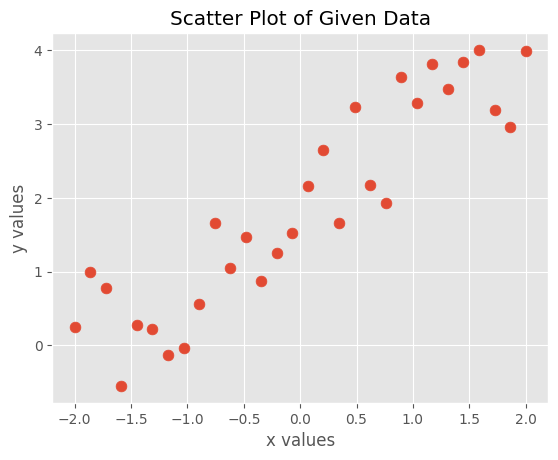

In [6]:
x = data[:, 0]
y = data[:, 1]

# Creating scatter plot
plt.scatter(x, y, s=60)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter Plot of Given Data')
plt.grid(True)
plt.show()

The normal equation is given by
\begin{equation}
X^TX\theta=X^Ty
\end{equation}
where
\begin{equation}
           X=
           \begin{pmatrix}
             1&x_1\\
             1&x_2\\
             1&\vdots\\
             1&x_m
           \end{pmatrix}
\end{equation}

In [4]:
# CONSTRUCT THE DESIGN MATRIX

X = #YOUR CODE HERE

In [31]:
# SOLVE THE NORMAL EQUATION

opt_theta_normal = #YOUR CODE HERE

#print('solution obtained by GD:', opt_w)
print('solution obtained by NE:', opt_theta_normal)

solution obtained by NE: [1.87270208 1.0559765 ]


3. implement gradient desdent
- Compute the cost 
\begin{equation}
\ell(\theta) = \frac{1}{2m}\sum^m_{i=1}(\hat{f}(x^{(i)};\theta)-y^{(i)})^2=\frac{1}{2m}\|X\theta-y\|^2_2
\end{equation}
where $\hat{f}(x;\theta)$ is given by linear model
$$
\hat{f}(x;\theta)=\theta_0+\theta_1x=\theta^Tx
$$
- compute the gradient 
$$
\partial_\theta\ell(\theta)=\sum^m_{i=1}x^{(i)}_j(\hat{f}(x^{(i)},\theta)-y^{(i)})
$$
or
\begin{equation}
\partial_\theta\ell(\theta)=\frac{1}{m}X^T(X\theta-y)
\end{equation}



In [32]:
def computeCost(X, y, theta):
       """
       Input
        X : design matrix
        y : the responses
        w : initial guess

        Return
        J : the loss evaluated at w
        grad : gradient of the loss evaluated at w

       """
       n_sample = len(y)
       #IMPLEMENT THE LOSS GIVEN IN EQ 1

       loss = #YOU CODE HERE
       # IMPLEMENT THE GRADIENT GIVEN EQ 2

       grad = #YOUR CODE HERE
       return [loss, grad]

# initialize the weight
theta = np.zeros(X.shape[1])
# check your result
print('your loss value is ', computeCost(X, y, theta)[0], '\t', 'the expected value is', 2.7)

[0. 0.]
your loss value is  2.7120845489549876 	 the expected value is 2.7


- choose a learning rate $\eta=0.02$
- set number of iteration, e.g., 400
- perform the update 
$$
    \theta_j\coloneqq \theta_j-\alpha\frac{1}{m}\sum^m_{i=1}x^{(i)}_j(\hat{f}(x^{(i)},\theta)-y^{(i)})
$$
Equivalently,
\begin{equation}
\theta\coloneqq \theta-\alpha\frac{1}{m}X^T(X\theta-y)
\end{equation}

In [8]:
# learning rate
eta = 0.02
# number of iterations
num_iters = 400

In [33]:
def gradientDescent(X, y, theta, eta, num_iters):
    """
    Return
    w : the updated weight
    eval_cost : evaluate the cost function at w

    Inputs:
    X : design matrix of the length of the training examples by the number of features
    y : vector of length size of the length of training examples
    w : weights
    alpha : learning rate
    num_iters : number of iterations
    """
    lossVals = []
    thetaVals = []
    for i in range(num_iters):
        thetaVals.append(theta)
        loss, grad = computeCost(X, y, theta)
        # IMPLEMENT THE UPDATE

        theta = #YOUR CODE HERE
        
        lossVals.append(loss)
    return [theta, lossVals, thetaVals]

In [35]:
#================================
# check minimum value using GD
#===============================
opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta, eta, num_iters)
# Check your result
print('Your result is ', opt_theta_GD, '\t the expected value from Normal equation', opt_theta_normal)

Your result is  [0.61764354 0.45910634] 	 the expected value from Normal equation [1.87270208 1.0559765 ]


Text(0.5, 1.0, 'loss vs iteration')

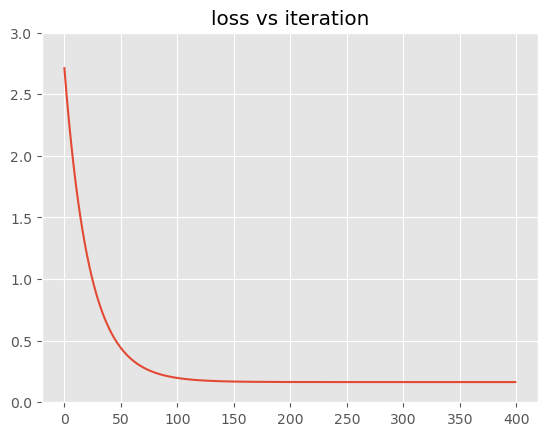

In [12]:
#===============================
# visualizing the loss function
#================================
plt.figure(2)
plt.plot(loss_history)
plt.ylim((0,3))
plt.title('loss vs iteration')

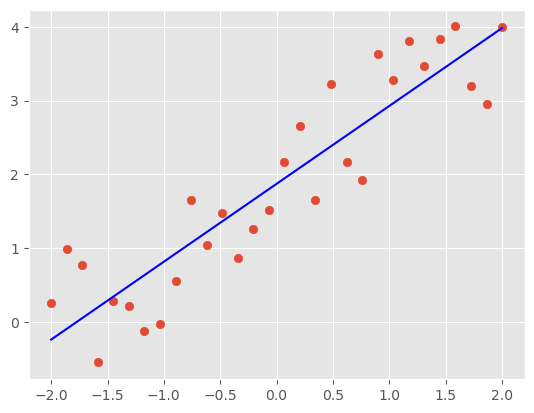

In [13]:
#=======================
#Visualize the model
#=======================
# create data for ploting
xi = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 100)
X_plot = np.c_[np.ones(100), xi]
model = X_plot.dot(opt_theta_normal)
plt.figure(1)
plt.scatter(x, y)
plt.plot(xi, model, 'b')

Using the model obtained, predict for unseen $x=2.5$ and $x=3$

In [14]:
# PREDICTION
unseen_x = np.array(([1, 2.5],[1, 3]))

predict = #YOUR CODE HERE

print('The prediction is', predict)

The prediction is [4.51264332 5.04063157]


Visualizing the loss vs iteration for different learning rates

(0.0, 4.0)

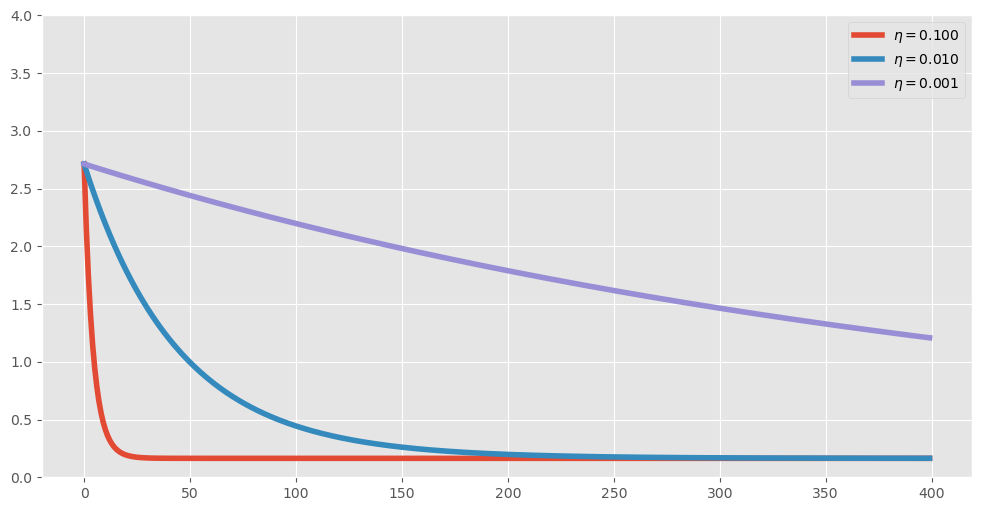

In [15]:
theta_list = [0.1,0.01,0.001]
fig = plt.figure(figsize=(12,6))
for eta in theta_list:
    theta1 = np.zeros(X.shape[1])
    opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta1, eta, num_iters)
    plt.plot(loss_history, linewidth=4, label='$\eta=$%0.3f'%eta)

plt.legend()
plt.ylim((0,4))

What do you observe?

What do you observe if you take the learning rate $\eta=2$?

Visualing the loss function

In [22]:
from matplotlib import cm
npoints = 100
w0 = np.linspace(-5, 5, npoints)
w1 = np.linspace(-5, 5, npoints)

W0, W1 = np.meshgrid(w0, w1)
cost_vals = np.empty((npoints, npoints))
for i in range(npoints):
    cost_vals[i] = [computeCost(X, y, np.array(w))[0] for w in zip(W0[i],W1[i])]

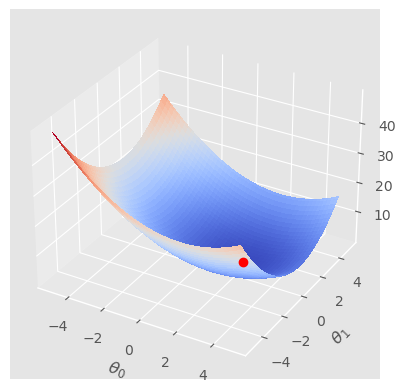

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(W0, W1, cost_vals, vmin=cost_vals.min() * 2, cmap=cm.coolwarm,
                       linewidth=0.5, antialiased=False)
#ax.set(xticklabels=[],
       #yticklabels=[],
       #zticklabels=[])

ax.set(xlabel=r'$\theta_0$', ylabel=r'$\theta_1$', zlabel='Z')
ax.plot(opt_theta_normal[0], opt_theta_normal[1], computeCost(X, y, opt_theta_normal)[0], marker='o', color='r')
plt.show()

# Feature normalization

This section will show you why feature normalization or standarztion are important in ML.

In [23]:
olympic_data = np.loadtxt('PATH_TO_THE_FILE/olympic.txt', delimiter=',')

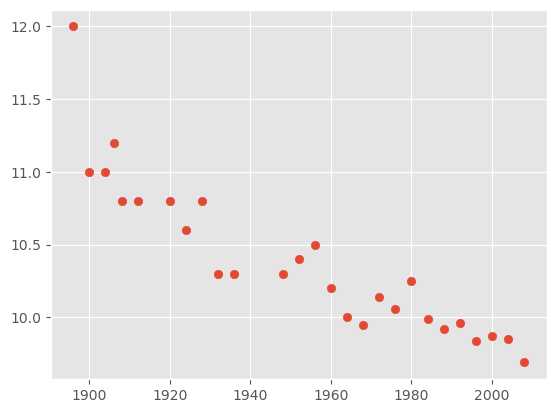

In [24]:
x_o = olympic_data[:,0]
y_o = olympic_data[:,1]
plt.scatter(x_o, y_o)

Using the the `computeCost` and `gradientDescent` find the optimal values for the 'olympic.txt' dataset

In [ ]:
#Your code here

> You will get an eror when running gradient descend here, can you explain why?

Normalize the training set.
Here we use,
$$
x^{std}_i:=\frac{x_i-\mu}{\sigma}
$$

Construct the new design matrix with input $x^{std}_i$. You can use Numpy `mean` to compute average and `std` for the standard deviation 

In [25]:
# COMPUTE THE STANDARDIZE INPUT
x_st = #YOUR CODE HERE

In [26]:
#=========================
# COMPUTE THE DESIGN MATRIX
#==========================

X1 = #YOUR CODE HERE

Run the gradient descent implemented above on the new design matrix

In [29]:
theta1 = np.zeros(X1.shape[1])
opt_theta_GD, loss_history, theta_history = gradientDescent(X1, y_o, theta1, eta, num_iters)
# Check your result
print('Your result ', opt_theta_GD,'\t expected result is', np.array([10.38962963,-0.46667477]))

Your result  [10.38641574 -0.46653042] 	 expected result is [10.38962963 -0.46667477]
